## Importando librerias necesarias

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder

## Informacion del dataset

- **trans_date_trans_time**: Fecha y hora de la transacción.
- **cc_num**: Número de la tarjeta de crédito utilizada.
- **merchant**: Nombre del comerciante donde se realizó la transacción.
- **category**: Categoría del comercio (por ejemplo, restaurante, supermercado, etc.).
- **amt**: Monto de la transacción.
- **first**: Primer nombre del titular de la tarjeta.
- **last**: Apellido del titular de la tarjeta.
- **gender**: Género del titular de la tarjeta.
- **street**: Dirección de residencia del titular de la tarjeta.
- **city**: Ciudad de residencia del titular de la tarjeta.
- **state**: Estado de residencia del titular de la tarjeta.
- **zip**: Código postal de la residencia del titular de la tarjeta.
- **lat**: Latitud de la residencia del titular de la tarjeta.
- **long**: Longitud de la residencia del titular de la tarjeta.
- **city_pop**: Población de la ciudad donde reside el titular de la tarjeta.
- **job**: Ocupación del titular de la tarjeta.
- **dob**: Fecha de nacimiento del titular de la tarjeta.
- **trans_num**: Número de identificación de la transacción.
- **unix_time**: Marca de tiempo en formato Unix para la transacción.
- **merch_lat**: Latitud del comerciante donde se realizó la transacción.
- **merch_long**: Longitud del comerciante donde se realizó la transacción.
- **is_fraud**: Indicador de si la transacción es fraudulenta (1) o no (0).

## Cargando Datos

In [2]:
data_train = pd.read_csv("../data/fraudTrain.csv")

In [3]:
data_train.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [4]:
data_train.shape

(1296675, 23)

## Analisis de datos

### Informacion de tipos de datos

In [5]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

### Numero de clases

In [6]:
data_train.is_fraud.value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

### Valores nulos

In [7]:
data_train.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

### Numero de duplicados

In [8]:
data_train.duplicated().sum()

np.int64(0)

## Limpieza de datos

In [9]:
data_train.drop(["Unnamed: 0"], inplace=True , axis= 1)

In [10]:
data_train.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


### Granulacion de la columna trans_date_trans_time	

In [11]:
data_train['trans_date_trans_time'] = pd.to_datetime(data_train['trans_date_trans_time'], format='%Y-%m-%d %H:%M:%S')
data_train.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [12]:
data_train['date'] = data_train['trans_date_trans_time'].dt.date
data_train['time'] = data_train['trans_date_trans_time'].dt.time
data_train.head(3)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,date,time
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51


In [13]:
columnas = ['date','time'] + [ col for col in data_train.columns if col not in ['date','time']]
data_train = data_train[columnas]
data_train.drop(columns=['trans_date_trans_time'], axis= 1 , inplace=True)

In [14]:
data_train.head(3)

,date,time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01,00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01,00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [25]:
card_transaction_counts = data_train['cc_num'].value_counts()
data_train['card_transaction_count'] = data_train['cc_num'].map(card_transaction_counts)
data_train.drop(columns=['cc_num'] , axis = 1 , inplace=True)

In [26]:
data_train.head(3)

,date,time,merchant,category,amt,first,last,gender,street,city,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,card_transaction_count
0,2019-01-01,00:00:18,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2028
1,2019-01-01,00:00:44,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,3030
2,2019-01-01,00:00:51,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,503


In [27]:
data_numeric = data_train.select_dtypes(include=np.number)

In [28]:
data_numeric

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,card_transaction_count
0,4.97,28654,36.0788,-81.1781,3495,1325376018,36.011293,-82.048315,0,2028
1,107.23,99160,48.8878,-118.2105,149,1325376044,49.159047,-118.186462,0,3030
2,220.11,83252,42.1808,-112.2620,4154,1325376051,43.150704,-112.154481,0,503
3,45.00,59632,46.2306,-112.1138,1939,1325376076,47.034331,-112.561071,0,493
4,41.96,24433,38.4207,-79.4629,99,1325376186,38.674999,-78.632459,0,2017
...,...,...,...,...,...,...,...,...,...,...
1296670,15.56,84735,37.7175,-112.4777,258,1371816728,36.841266,-111.690765,0,1513
1296671,51.70,21790,39.2667,-77.5101,100,1371816739,38.906881,-78.246528,0,531
1296672,105.93,88325,32.9396,-105.8189,899,1371816752,33.619513,-105.130529,0,2070
1296673,74.90,57756,43.3526,-102.5411,1126,1371816816,42.788940,-103.241160,0,2024


In [36]:
data_numeric.corr()['is_fraud'].sort_values(ascending=True)

card_transaction_count   -0.054882
unix_time                -0.005078
zip                      -0.002162
long                      0.001721
merch_long                0.001721
merch_lat                 0.001741
lat                       0.001894
city_pop                  0.002136
amt                       0.219404
is_fraud                  1.000000
Name: is_fraud, dtype: float64

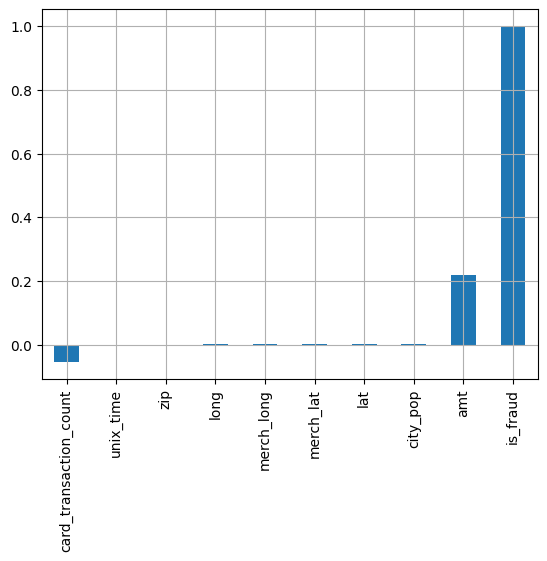

In [35]:
data_numeric.corr()['is_fraud'].sort_values(ascending=True).plot(kind='bar')
plt.grid()

## Codificacion de datos categoricos

In [39]:
encoder = OrdinalEncoder()
